# import data

In [1]:
from glob import glob
import os
import sys
from tqdm import tqdm

In [111]:
# 读取数据
data_path = r'E:\MIEdata'
fileNames = glob(data_path+'\\p=-1*.txt')

M,ALPHA=[],[]
sr = 1800 + 1
i1 = np.zeros((len(fileNames), sr))
i2 = np.zeros((len(fileNames), sr))
for idx, i in enumerate(fileNames):
    baseName = os.path.basename(i) # 'p=-1,m=0.95,a=973.88.txt'
    _,m,alpha = baseName.split(',')
    alpha = '.'.join(alpha.split('.')[:-1])
    m = m.split('=')[-1]
    alpha=alpha.split('=')[-1]
    M.append(m)
    ALPHA.append(alpha)
    i1[idx] = pd.read_table(i, encoding='gb2312',sep='\t',index_col=None).I1.to_numpy().astype(np.float32)
    i2[idx] = pd.read_table(i, encoding='gb2312',sep='\t',index_col=None).I2.to_numpy().astype(np.float32)

['E:\\MIEdata\\p=-1,m=0.05,a=10.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=100.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=101.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=102.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=103.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=104.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=105.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=106.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=107.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=108.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=109.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=11.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=110.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=111.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=112.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=113.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=114.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=115.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=116.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=117.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=118.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=119.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=12.00.txt',
 'E:\\MIEdata\\p=-1,m=0.05,a=120.00.t

In [2]:
data_path = r'D:\mydata\all_m_alpha'
fileNames = glob(os.path.join(data_path,'*0.txt'))
fileNames[:10]

['D:\\mydata\\all_m_alpha\\m=0.300000,a=0.250000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.300000,a=0.500000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.300000,a=0.750000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.300000,a=1.000000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.300000,a=1.250000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.300000,a=1.500000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.300000,a=1.750000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.300000,a=10.000000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.300000,a=10.250000.txt',
 'D:\\mydata\\all_m_alpha\\m=0.300000,a=10.500000.txt']

In [3]:
# dump
def dump(sr=None, size=7000):
    
    M,ALPHA=[],[]
    if sr is None: # 从配置文件中获取 sr
        with open(data_path+'\\输入参数文本.txt') as _f:
            _paras = _f.readlines()
            sr = int(_paras[2].split('\t')[0]) + 1
            print('sr=',sr)

    # --------------------------------------------------------------通用begin
    with open(fileNames[0]) as _f:
        simple_size = sys.getsizeof(_f.read())/1024/1024 # Mb

    size = size # 2048:2GB
    num = int(size/simple_size)+1 # 每一次存的大小是 num个读取的文件
    N = int(len(fileNames)//num)  # 存N次大小为num个的文件
    last_num = len(fileNames)%num # 最后一次存的文件是 last_num个读取的文件
    begin=0
    print('size,simple_size,num,N,last_num\n',size,simple_size,num,N,last_num)
    for c_i in tqdm(range(N+1)):
        if c_i==N:
            num = last_num
        last = begin+num
        filename = fileNames[begin:last]
    # --------------------------------------------------------------通用end
        i1 = np.zeros((len(filename), sr))
        i2 = np.zeros((len(filename), sr))
        dop = np.zeros((len(filename), sr))
        for idx, i in enumerate(filename):
            baseName = os.path.basename(i) 
            m,alpha = baseName.split(',')
            alpha = '.'.join(alpha.split('.')[:-1])
            m = m.split('=')[-1]
            alpha=alpha.split('=')[-1]
            M.append(m)
            ALPHA.append(alpha)

            i1[idx] = pd.read_table(i, encoding='gb2312',sep='\t',index_col=None).I1.to_numpy().astype(np.float32)
            i2[idx] = pd.read_table(i, encoding='gb2312',sep='\t',index_col=None).I2.to_numpy().astype(np.float32)
            dop[idx] = pd.read_table(i, encoding='gb2312',sep='\t',index_col=None).DOP.to_numpy().astype(np.float32)
    # --------------------------------------------------------------- 通用bedin
        out_path = r'D:\mydata\out'
        np.save(os.path.join(out_path, f'i1_{c_i}.npy'),i1)
        np.save(os.path.join(out_path, f'i2_{c_i}.npy'),i2)
        np.save(os.path.join(out_path, f'dop_{c_i}.npy'),dop)
        np.savez(os.path.join(out_path, f'M_ALPHA_{c_i}.npz'),M=M,ALPHA=ALPHA)
        begin = last
    # --------------------------------------------------------------- 通用end
    return out_path


In [ ]:
target_path, sr = dump()

sr= 2048
size,simple_size,num,N,last_num
 7000 0.1297311782836914 53958 6 12252


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

In [ ]:
# load
def load_data(path):
    fileNames = glob(os.path.join(path,'*'))
    
    name_i1 = [i for i in fileNames if 'i1' in i]
    name_i2 = [i for i in fileNames if 'i2' in i]
    name_dop = [i for i in fileNames if 'dop' in i]
    name_m_alpha = [i for i in fileNames if 'M_ALPHA' in i]
    L = len(name_dop) # 3种文件数目相同
    c = 0
    while True:
        i1 = np.load(name_i1[c%L])
        i2 = np.load(name_i2[c%L])
        dop = np.load(name_dop[c%L])
        res = np.load(name_m_alpha[c%L])
        M, ALPHA = res['M'], res['ALPHA']
        yield i1, i2, dop, M, ALPHA
        c += 1

data = load_data(target_path)
i1, i2, dop, M, ALPHA = next(data)

In [ ]:
# M,ALPHA=[],[]
# sr = 2048
# i1 = np.zeros((len(fileNames), sr))
# i2 = np.zeros((len(fileNames), sr))
# dop = np.zeros((len(fileNames), sr))
# for idx, i in enumerate(fileNames):
#     baseName = os.path.basename(i) # 'm=0.95,a=973.88.txt'
#     m,alpha = baseName.split(',')
#     alpha = '.'.join(alpha.split('.')[:-1])
#     m = m.split('=')[-1]
#     alpha=alpha.split('=')[-1]
#     M.append(m)
#     ALPHA.append(alpha)
    
#     i1[idx] = pd.read_table(i, encoding='gb2312',sep='\t',index_col=None).I1.to_numpy().astype(np.float32)
#     i2[idx] = pd.read_table(i, encoding='gb2312',sep='\t',index_col=None).I2.to_numpy().astype(np.float32)
#     dop[idx] = pd.read_table(i, encoding='gb2312',sep='\t',index_col=None).DOP.to_numpy().astype(np.float32)

('0.650000', '120.250000')

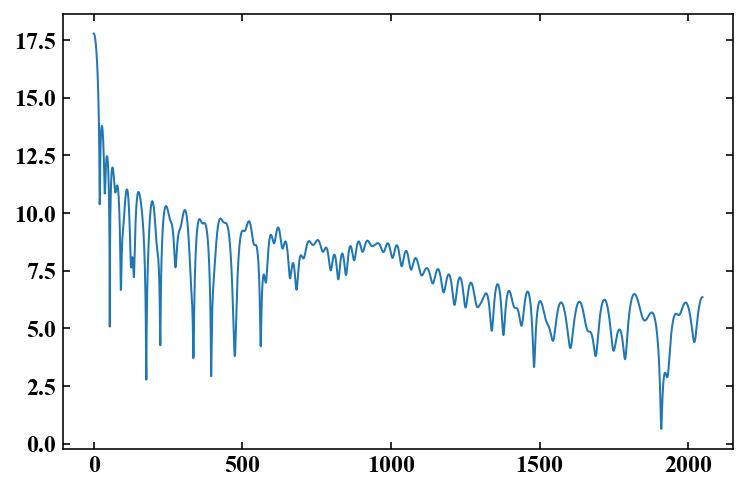

In [47]:
IDX = 100
plt.plot(np.log(i1[IDX]))
M[IDX], ALPHA[IDX]

In [35]:
L = len(fileNames)
S = np.arange(L)
np.random.shuffle(S)
S

array([3644, 1685, 3467, ..., 3133, 1852, 2262])

In [280]:
def generateData(batch,theta1, theta2,i1, i2, dop,M, ALPHA, L=len(fileNames), sr=sr):
    S = np.arange(L-1)

    d_the = (sr-1)/180
    th1, th2 = int(theta1*d_the), int(theta2*d_the)
    SR = th2-th1
    while True:
        np.random.shuffle(S)
        series = S[:batch]
        yield SR,\
        i1[series, th1:th2].astype(np.float32)[...,None], \
        i2[series, th1:th2].astype(np.float32)[...,None], \
        dop[series, th1:th2].astype(np.float32)[...,None], \
        np.array(M)[series].astype(np.float32)[...,None], \
        np.array(ALPHA)[series].astype(np.float32)[...,None]
        
theta1, theta2 = 15, 36
sr = 2048
data = generateData(15, theta1=theta1, theta2=theta2,i1,i2,dop,M,ALPHA)
SR = next(data)[0]

In [243]:
print(next(data)[0])
print(next(data)[1].shape) # i1
print(next(data)[2].shape) # i2
print(next(data)[3].shape) # dop
print(next(data)[4].shape) # M
print(next(data)[5].shape) # ALPHA

239
(15, 239, 1)
(15, 239, 1)
(15, 239, 1)
(15, 1)
(15, 1)


In [174]:
NEXT = next(data)

(array([0.81], dtype=float32), array([48.], dtype=float32))

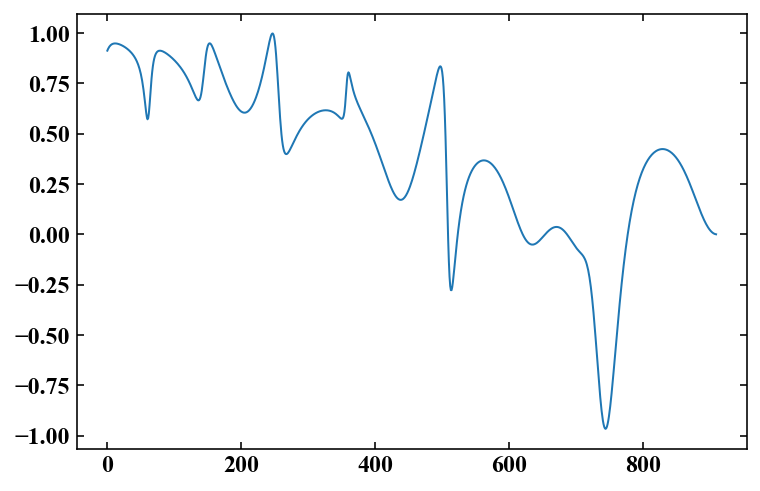

In [179]:

IDX = 11
plt.plot(NEXT[2][IDX])
NEXT[-2][IDX], NEXT[-1][IDX]

In [111]:
# 指定CPU跑
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
import numpy as np
# tf.test.is_gpu_available()
from tensorflow.keras import Input,Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Concatenate, Conv2D,Conv1D,Convolution1D,\
Flatten, BatchNormalization,Input,Dropout
from tensorflow.keras.layers import LeakyReLU, ReLU, LayerNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adadelta, Adam, SGD
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, MAE, KLD, MSLE, MSE

In [244]:
# Model 1
def model1():
    input_x = Input(shape=(SR, 1))
    # x = LayerNormalization()(input_x)
    x = input_x

    x = Conv1D(2, 4, strides=2,padding='same')(x)
    # x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv1D(4, 3, strides=2,padding='same')(x)

    x = ReLU()(x)
    x = Conv1D(8, 3, strides=2,padding='same')(x)

    x = ReLU()(x)
    x = Conv1D(16, 3, strides=2,padding='same')(x)

    x = ReLU()(x)
    x = Conv1D(32, 3, strides=2,padding='same')(x)

    x = ReLU()(x)
    x = Flatten()(x)

    x = Dense(100,'relu')(x)
    rm = Dense(1,'sigmoid')(x)
    alpha = Dense(1,'relu')(x)
    dop = Dense(1, 'tanh')(x)
    model_m = Model(input_x, rm)
    model_alpha = Model(input_x, alpha)
    model_dop = Model(input_x, dop)
    return model_m, model_alpha, model_dop

In [363]:
# Model 2
def model2():
    input_x = Input(shape=(SR, 1))
    # x = LayerNormalization()(input_x)
    x = input_x
    x = Flatten()(x)
    
    x = Dense(SR*10,'relu')(x)
    x = Dense(SR*5,'relu')(x)
    x = Dense(SR,'relu')(x)
#     x = Dense(SR//2,'relu')(x)
    rm = Dense(1,'sigmoid')(x)
    alpha = Dense(1, 'relu')(x)
    dop = Dense(1, 'sigmoid')(x)
    
    model_m = Model(input_x, rm)
    model_alpha = Model(input_x, alpha)
    model_dop = Model(input_x, dop)
    return model_m, model_alpha, model_dop

In [364]:
model_rm, model_alpha, model_dop = model2()

model = model_dop
# model = model_rm
model.summary()

Model: "model_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 239, 1)]          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 239)               0         
_________________________________________________________________
dense_101 (Dense)            (None, 2390)              573600    
_________________________________________________________________
dense_102 (Dense)            (None, 1195)              2857245   
_________________________________________________________________
dense_103 (Dense)            (None, 239)               285844    
_________________________________________________________________
dense_106 (Dense)            (None, 1)                 240       
Total params: 3,716,929
Trainable params: 3,716,929
Non-trainable params: 0
________________________________________________

In [365]:
model.compile(loss= MSE,
              optimizer=Adam(learning_rate=2e-4, beta_1=0.5)
#               optimizer=SGD()
             )

In [366]:
batch = 150
theta1, theta2 = 15, 36
DATA = load_data(target_path)
i1,i2,dop,M,ALPHA = next(DATA)
data = generateData(15,theta1,theta2,i1,i2,dop,M,ALPHA)

In [368]:
# 使用集成度较低的 Model.train_on_batch方法，自行设定batch数据　和　epochs
for step in range(200):
    train_data = next(data)
#     cost = model.train_on_batch(train_data[1], train_data[-2]) # i1
#     cost = model.train_on_batch(train_data[2], train_data[-2]) # i2
    cost = model.train_on_batch(train_data[3], train_data[-2]) # dop

    if step%100==0:
        print(f'loss: {cost}')

loss: 0.011564945802092552
loss: 0.008765244856476784


In [361]:
def test(theta1=theta1, theta2=theta2, noise=False):
    test_i1, test_i2, test_dop = gen(alpha = 120, rm = 0.78, N_ta = sr-1)
    d_the = (sr-1)/180
    th1, th2 = int(theta1*d_the), int(theta2*d_the)
    SR = th2-th1
    test_i1, test_i2, test_dop = test_i1[th1:th2], test_i2[th1:th2], test_dop[th1:th2]
    
    if noise:
        noise = np.random.rand(SR, 1) * 0.05
        noise_dop = (np.random.rand(SR, 1)-0.5) * 0.05
        test_i1, test_i2, = test_i1+noise, test_i2+noise
        test_dop = test_dop + noise_dop
    return test_i1, test_i2, test_dop 

test_i1, test_i2, test_dop = test(theta1, theta2, noise=1)

In [362]:
# pred_data = model.predict(np.log(test_i2[None,]))
pred_data = model.predict(test_dop[None,])
print(pred_data)

[[0.78330165]]


In [86]:
def test_generateData(alpha,rm,im =0.0,N_ta = 2**13-1):
    origin_path = os.getcwd()
#     os.chdir(r"C:\Users\beidongjiedeguang\Desktop\测试文件夹")
    os.chdir(r"C:\Users\Administrator\OneDrive\Mie测试文件夹")
    exeName = "Mie_Calculation.exe"
    txtName = '输入参数文本.txt'

    Ta_min, Ta_max = 0,180
    with open(txtName,'w') as f1:
        f1.write('{}\n{:.3f}\t{:.3f}\n{}\t{:.2f}\t{:.2f}'
                .format(alpha,rm,im,N_ta,Ta_min,Ta_max))

    os.system(exeName)
    dataName = "散射光强角分布.txt"
    # 没想到c写出来的不是utf-8编码的，所以这里encoding='gbk'，后面这个delimiter随便要不要
    data = pd.read_csv(dataName,sep ='\t',engine='python',encoding='gbk',delimiter='\s+')
    os.remove(dataName)
    os.chdir(origin_path)
    return data

def gen(alpha = 9000, rm = 1.7, im= 0.0, N_ta = 2**13-1):
    data = test_generateData(alpha,rm,im, N_ta = N_ta)
    theta = data['散射角'].to_numpy()
    i1, i2, DOP = data['I1'].to_numpy(), data['I2'].to_numpy(), data['可视度'].to_numpy()
    return i1[...,None], i2[...,None], DOP[...,None]